# Telecom Customer Churn

## Identify the number of customer who have churned and analyze the key factors contributing to customer churn based on the given data set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [110]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
# Identify the number of Rows and Columns
df.shape

(7043, 21)

In [10]:
# identify data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Converting 'TotalCharges' from object to float. It should be a numeric column, but due to spaces in some rows,
# it's stored as object and shows no null values. Hence replaceing null to 0


In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace("  ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [14]:
# Identify null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
#descriptive analytics of the data set
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
# checking if there is any duplicat value in the data set
df.duplicated().sum()

0

In [23]:
# Checking for duplicate entries in the "customerID" field to ensure there is no duplicate value in the dataset.
df["customerID"].duplicated().sum()

0

In [6]:
# Converting 'SeniorCitizen' from 0 and 1 to 'Yes' or 'No' using a custom function

def conv(values):
    if values == 1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)


In [102]:
df["SeniorCitizen"].value_counts()

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

In [8]:
# Visualizing Churn Count Using Countplot

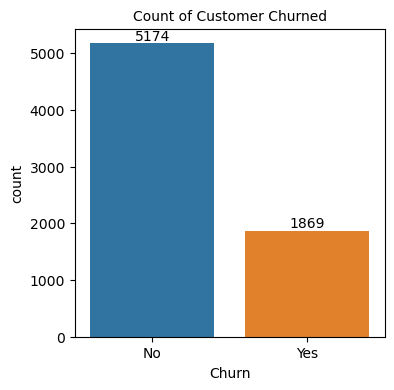

In [66]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = "Churn", data = df)
plt.title("Count of Customer Churned" , fontsize = 10)
ax.bar_label(ax.containers[0])

plt.show()

In [42]:
# To calculate the churn percentage, we will group the data by the 'Churn' column

In [37]:
gb = df.groupby("Churn").agg({"Churn": "count" })
gb

,Churn
Churn,
No,5174
Yes,1869


In [38]:
# Calculate the percentage of customers who have churned

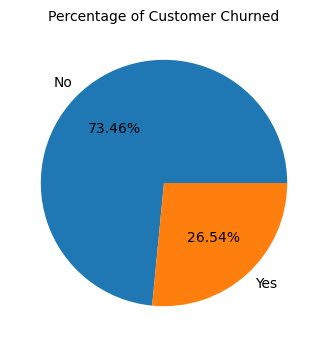

In [65]:
plt.figure(figsize=(4,4))
plt.pie(gb["Churn"], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Customer Churned", fontsize = 10)
plt.show()

As per the chart above, we can observe that approximately 26.54% of the total customers have churned. Now lets exlore the reason behind this.

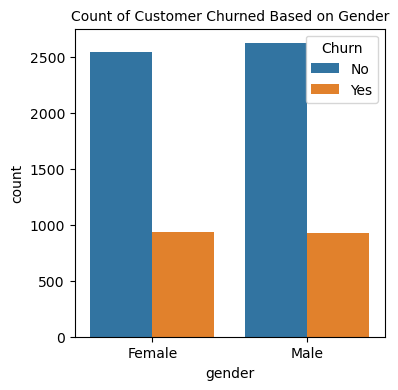

In [74]:
plt.figure(figsize=(4,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Count of Customer Churned Based on Gender" , fontsize = 10)

plt.show()


Churn Count Based on Gender

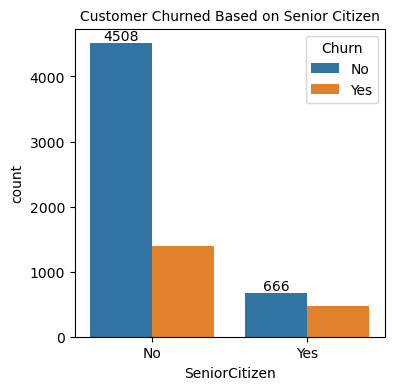

In [34]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Customer Churned Based on Senior Citizen" , fontsize = 10)


plt.show()

Churn count based on Senior Citizen

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


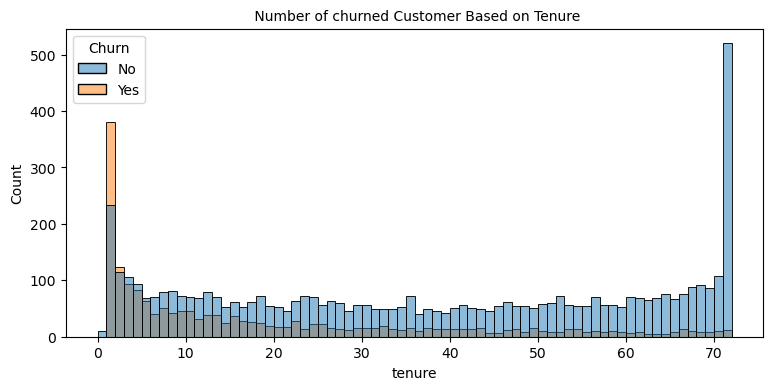

In [35]:
plt.figure(figsize=(9,4))
sns.histplot( x = "tenure", data = df, bins = 72, hue = "Churn")
plt.title(" Number of churned Customer Based on Tenure" , fontsize = 10)

plt.show()

People who have used our service for long term havae stayed but customers who used the service for a shorter time often end up leaving.

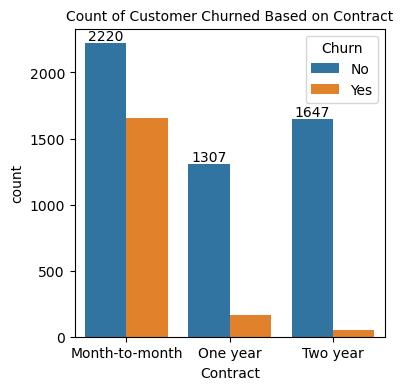

In [36]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer Churned Based on Contract" , fontsize = 10)


plt.show()

As seen in the chart above, customers with month-to-month contracts have a higher churn rate, while those with one-year or two-year contracts tend to stay longer.

In [26]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

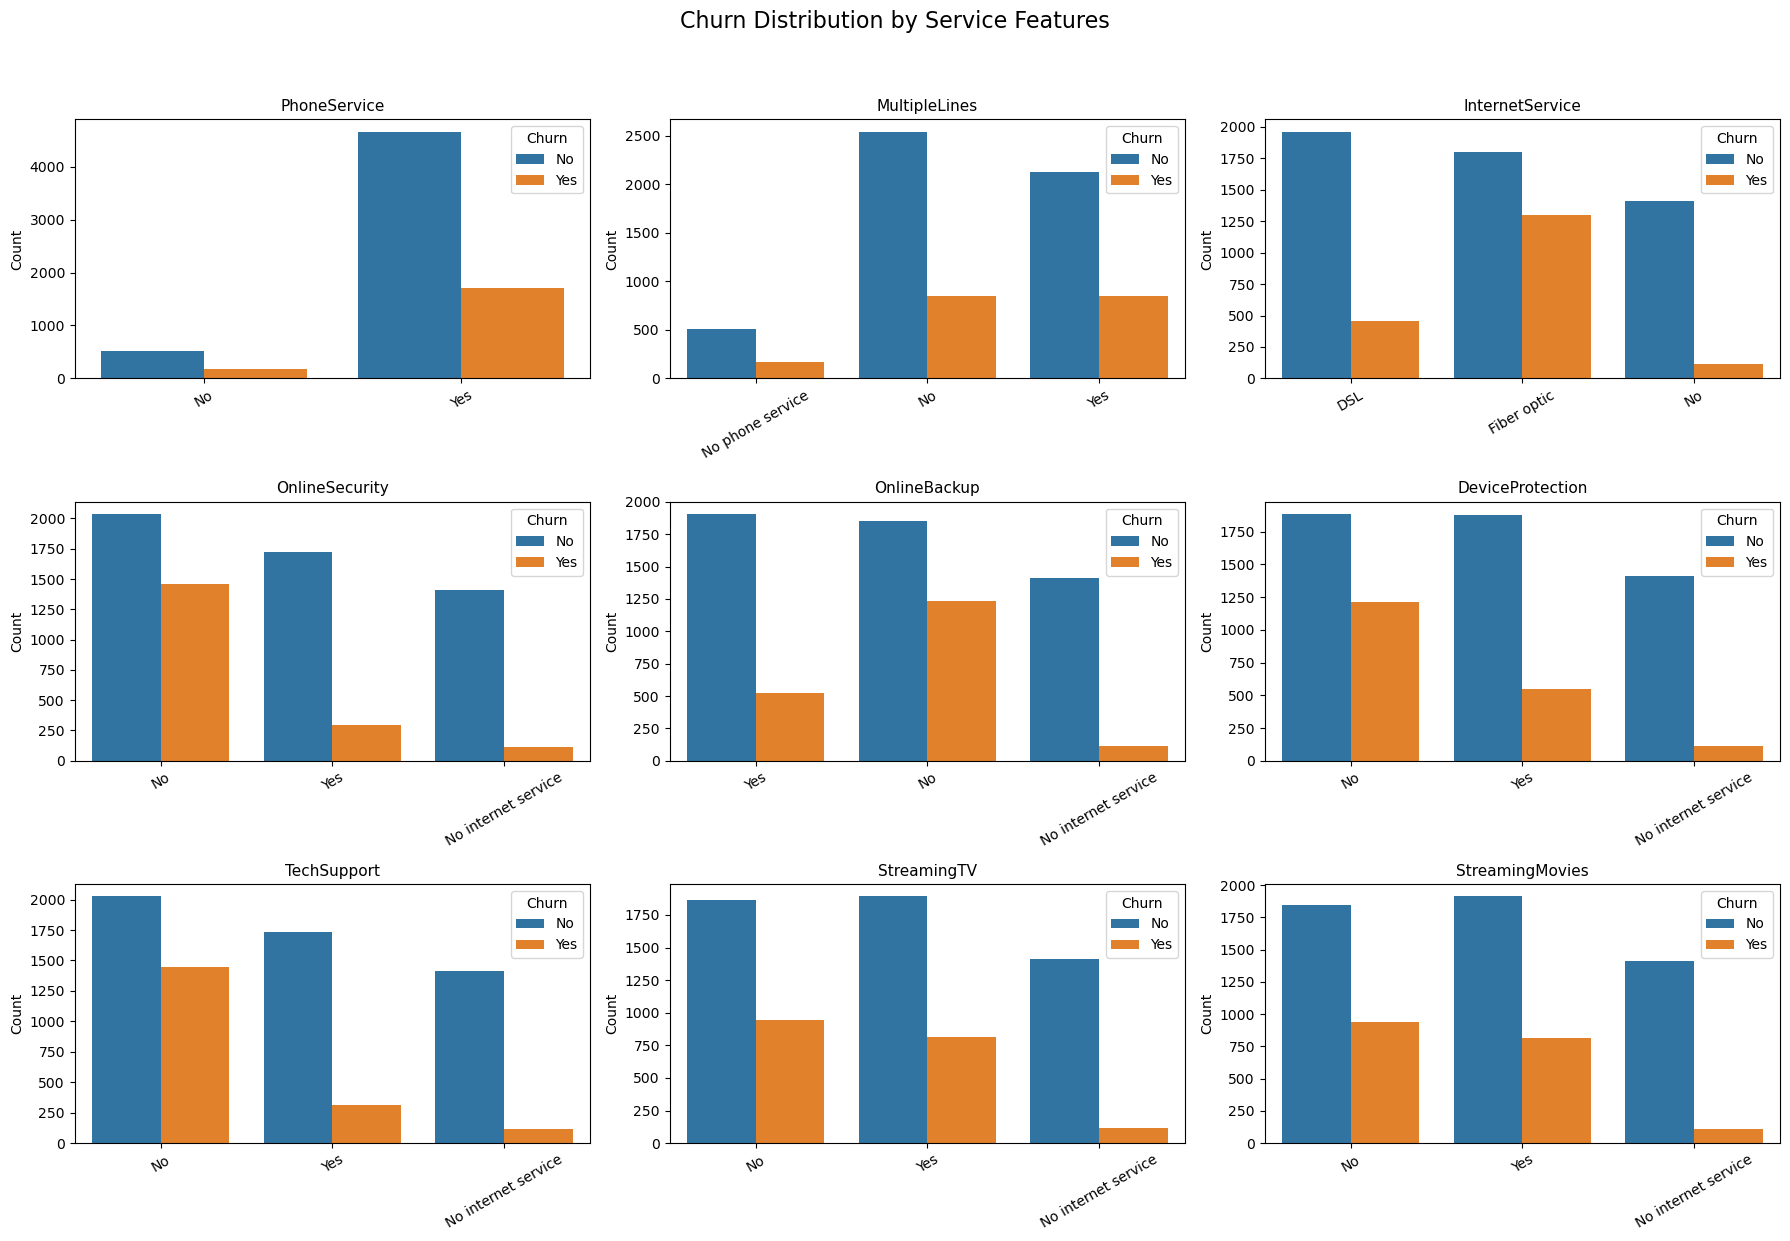

In [29]:
# List of service-related columns
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set figure size
plt.figure(figsize=(18, 12))

# Loop to create subplots
for i, col in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=df, hue="Churn")  # Churn added as hue
    plt.title(f'{col}', fontsize=11)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=30)

# Main title
plt.suptitle("Churn Distribution by Service Features", fontsize=16, y=1.03)

plt.tight_layout()
plt.show()


Customers who do not use services like Online Security, Tech Support, or Device Protection are more likely to churn. Fiber Optic users show significantly higher churn. Customers without internet or phone service rarely churn  possibly because they don’t actively use the service. Streaming services (TV & Movies) show moderate churn, indicating they may not strongly influence loyalty.

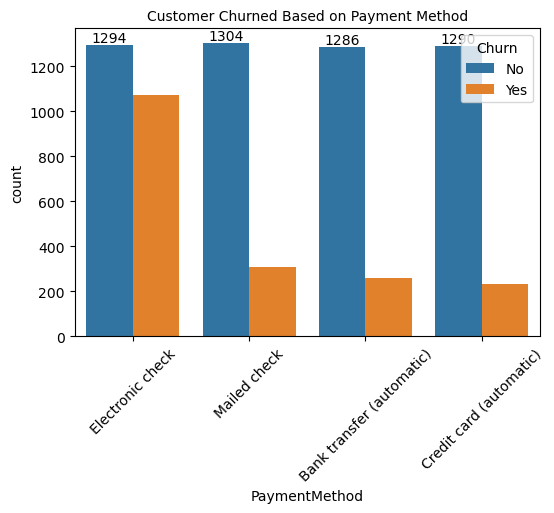

In [39]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title("Customer Churned Based on Payment Method" , fontsize = 10)




plt.show()

As per the analysis, most customers who churned used Electronic Check or Mailed Check as their payment method, while those who stayed preferred automated options like Bank Transfer or Credit Card.